## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

## Preparing the Dataset

In [3]:
df = pd.read_csv('./data/auto-irrigation/data.csv')
df.head()

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [4]:
X, Y = df.drop(['crop', 'pump'], axis=1, inplace=False), df['pump']

In [5]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(f"Shape of X-Train: {train_x.shape}")
print(f"Shape of Y-Train: {train_y.shape}")
print(f"Shape of X-Test: {test_x.shape}")
print(f"Shape of Y-Test: {test_y.shape}")

Shape of X-Train: (160, 2)
Shape of Y-Train: (160,)
Shape of X-Test: (40, 2)
Shape of Y-Test: (40,)


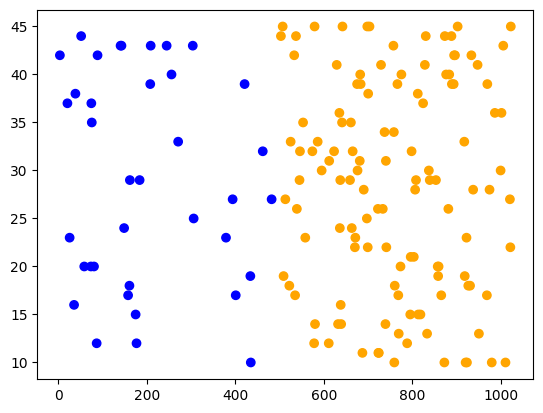

In [6]:
colors = list(map(lambda x: 'orange' if x else 'blue', train_y.values.ravel()))
plt.scatter(train_x['moisture'], train_x['temp'], c=colors)

## Model Training

In [7]:
model = KMeans(n_clusters=2)

In [8]:
model.fit(train_x)

KMeans(n_clusters=2)

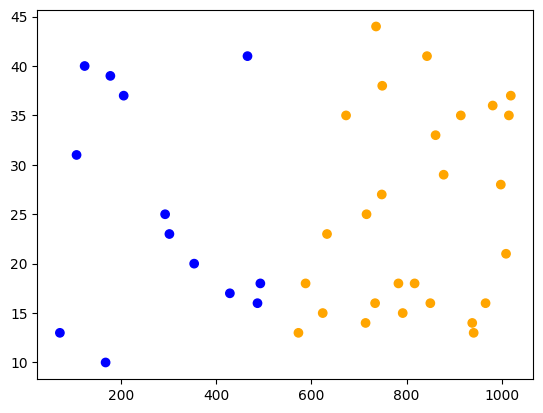

In [9]:
colors = list(map(lambda x: 'orange' if x else 'blue', test_y.values.ravel()))
plt.scatter(test_x['moisture'], test_x['temp'], c=colors)

## Validation

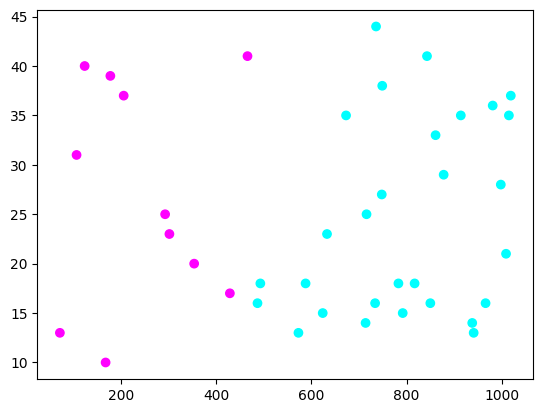

In [10]:
y_hat = model.predict(test_x)
colors = list(map(lambda x: 'magenta' if x else 'cyan', y_hat.ravel()))
plt.scatter(test_x['moisture'], test_x['temp'], c=colors)

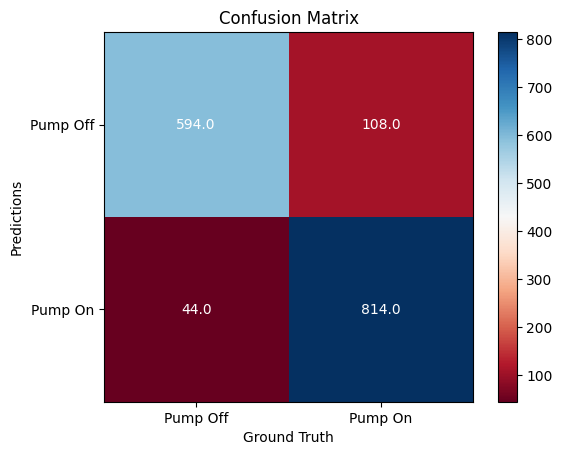

In [16]:
from sklearn.metrics.cluster import pair_confusion_matrix
matrix = pair_confusion_matrix(test_y.values.ravel(), y_hat.ravel())

figure = plt.figure()
axes = figure.add_subplot(111)
# using the matshow() function 
caxes = axes.matshow(matrix, cmap='RdBu')
figure.colorbar(caxes)

axes.set_title('Confusion Matrix')
axes.set_xticks([0, 1], ['Pump Off', 'Pump On'])
axes.xaxis.set_ticks_position('bottom')
axes.set_yticks([0, 1], ['Pump Off', 'Pump On'])
axes.set_xlabel('Ground Truth')
axes.set_ylabel('Predictions')

for (i, j), z in np.ndenumerate(matrix):
    axes.text(j, i, '{:0.1f}'.format(z), ha='center', va='center', c='white')

plt.show()


## Outlier Detection

The **Isolation Forest** is an ensemble of “Isolation Trees” that “isolate” observations by recursive random partitioning, which can be represented by a tree structure. The number of splittings required to isolate a sample is lower for outliers and higher for inliers.

In [11]:
# Creating a simulated IoT sensor dataset
np.random.seed(42)
data_size = 200
sensor_data = {
    'Temperature': np.random.normal(35, 5, data_size),
    'Vibration': np.random.normal(0.5, 0.1, data_size),
    'Pressure': np.random.normal(1.2, 0.2, data_size),
    'Failure': np.random.choice([0, 1], data_size, p=[0.8, 0.2])  # 0: No Failure, 1: Failure
}
df = pd.DataFrame(sensor_data)
df.head()

,Temperature,Vibration,Pressure,Failure
0,37.483571,0.535779,0.881114,0
1,34.308678,0.556078,1.080125,0
2,38.238443,0.608305,1.201049,0
3,42.615149,0.605380,1.209396,0
4,33.829233,0.362233,1.109987,0


In [12]:
# Splitting the data into training and testing sets
X = df.drop('Failure', axis=1)
y = df['Failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

# Preprocessing: Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

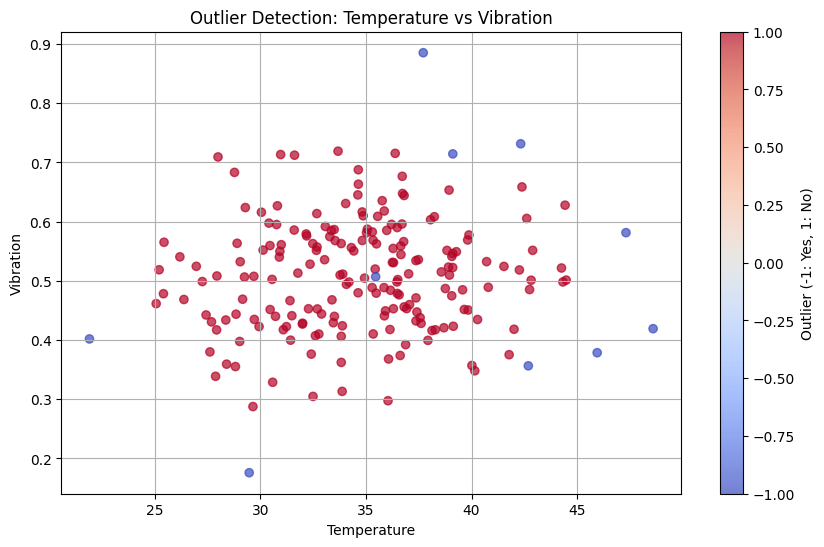

In [14]:
from sklearn.ensemble import IsolationForest

# Applying Isolation Forest for Outlier Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)
df['Outlier'] = outliers
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Vibration'], c=df['Outlier'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Temperature')
plt.ylabel('Vibration')
plt.title('Outlier Detection: Temperature vs Vibration')
plt.colorbar(label='Outlier (-1: Yes, 1: No)')
plt.grid(True)
plt.show()